<h1><mark>import libraries</mark></h1>

In [84]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

<h1><mark>import data</mark></h1>

In [85]:
df =pd.read_csv('walmart-sales.csv')

<h1><mark>display data</mark></h1>

In [86]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [88]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<h1><mark>some visualization on the data to find some relations between the data before cleaning</mark></h1>

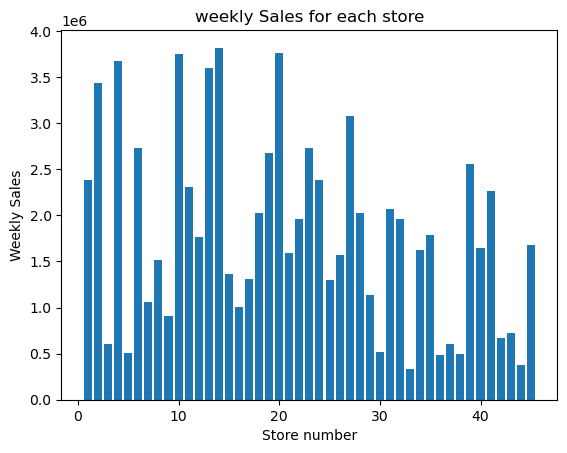

In [89]:
plt.bar(df["Store"],df["Weekly_Sales"])
plt.xlabel("Store number")
plt.ylabel("Weekly Sales")
plt.title("weekly Sales for each store")
plt.show()

In [90]:
sales=df.groupby(df["Store"])["Weekly_Sales"].sum()
sales_frame=sales.to_frame().reset_index()
sales_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         45 non-null     int64  
 1   Weekly_Sales  45 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 852.0 bytes


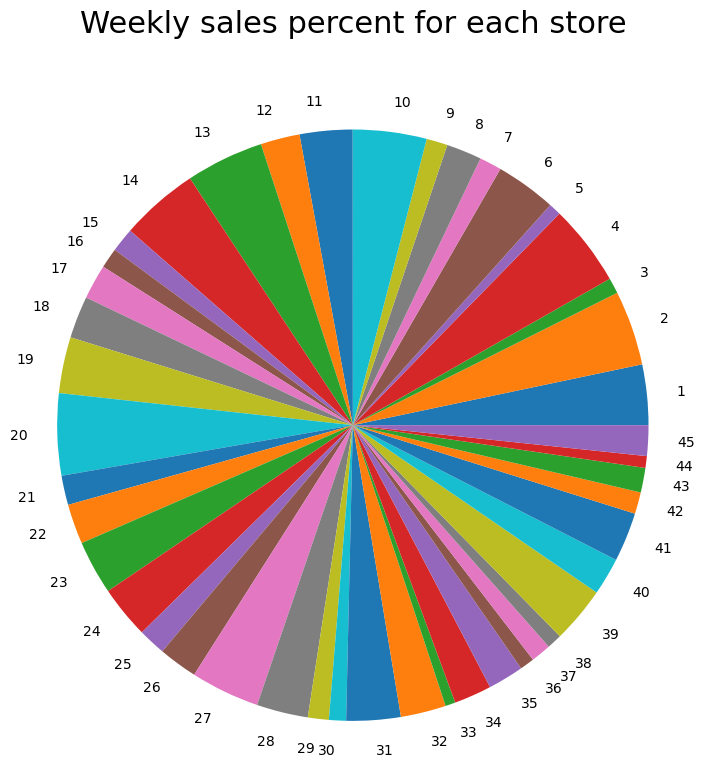

In [91]:
plt.pie(sales_frame["Weekly_Sales"],labels=sales_frame["Store"],radius = 2)
plt.title("Weekly sales percent for each store",size=22,pad=150)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

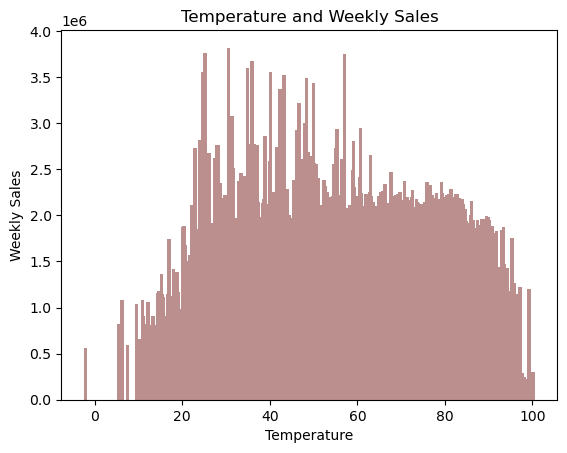

In [92]:
plt.bar(df["Temperature"],df["Weekly_Sales"],color="rosybrown")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Temperature and Weekly Sales")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

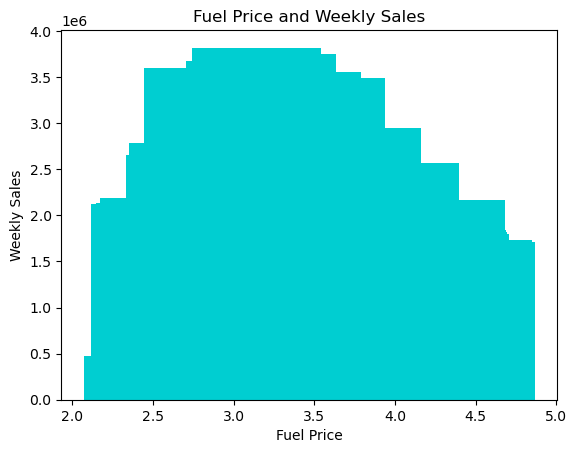

In [93]:
plt.bar(df["Fuel_Price"],df["Weekly_Sales"],color="darkturquoise")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.title("Fuel Price and Weekly Sales")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

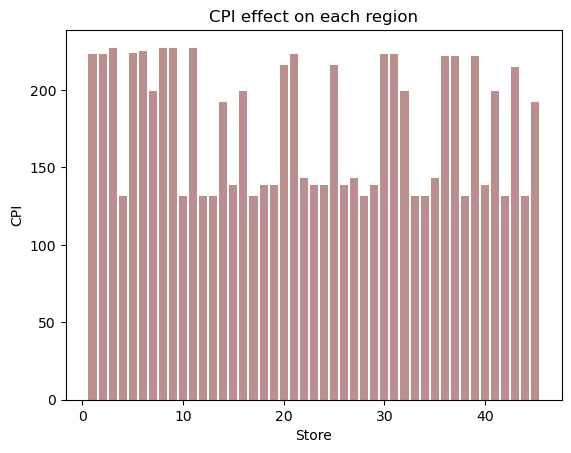

In [94]:
plt.bar(df["Store"],df["CPI"],color="rosybrown")
plt.xlabel("Store")
plt.ylabel("CPI")
plt.title("CPI effect on each region")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

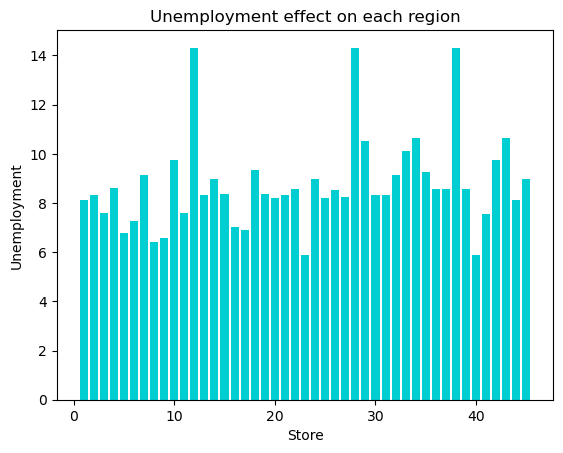

In [95]:
plt.bar(df["Store"],df["Unemployment"],color="darkturquoise")
plt.xlabel("Store")
plt.ylabel("Unemployment")
plt.title("Unemployment effect on each region")
plt.show

<h1><mark>check and clean for the null and duplicated values in the data</mark></h1>

In [96]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [97]:
df.dropna(inplace=True)

In [98]:
df.duplicated().sum()

0

In [99]:
df.drop_duplicates()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


<h1><mark>check and clean outliers in the data by using boxplot</mark></h1>

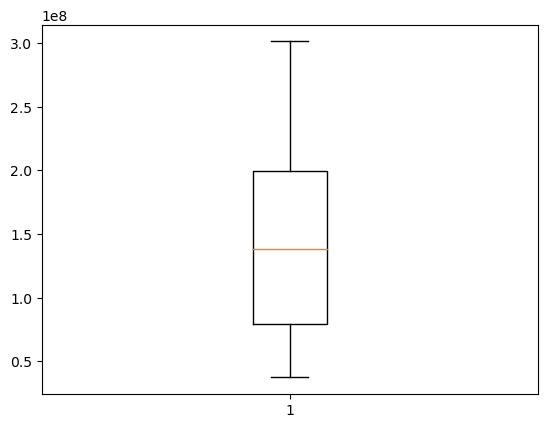

In [100]:
plt.boxplot(sales_frame["Weekly_Sales"])
plt.show()

<h1><mark>then there is no outliers for the sales/each store but lets lets check the sales for all stores in the data</mark></h1>

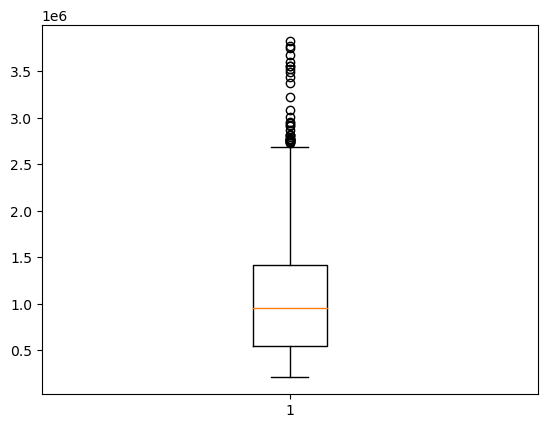

In [101]:
plt.boxplot(df["Weekly_Sales"])
plt.show()

<h1><mark>we can see there is outliers</mark></h1>

In [102]:
df["Weekly_Sales"].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

<h1><mark>now we will use IQR method to remove this outliers</mark></h1>

In [103]:
q1=df["Weekly_Sales"].quantile(0.25)

In [104]:
q3=df["Weekly_Sales"].quantile(0.75)

In [105]:
iqr=q3-q1

In [106]:
q1,q3,iqr

(553350.105, 1420158.66, 866808.5549999999)

In [107]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(2720371.4924999997, -746862.7275)

<h1><mark>now we can determine the rows that contain outliers</mark></h1>

In [108]:
df.loc[(df["Weekly_Sales"]>upper_limit)|(df["Weekly_Sales"]<lower_limit)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
189,2,24-12-2010,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,23-12-2011,3224369.80,0,46.66,3.112,218.999550,7.441
471,4,26-11-2010,2789469.45,1,48.08,2.752,126.669267,7.127
474,4,17-12-2010,2740057.14,0,46.57,2.884,126.879484,7.127
475,4,24-12-2010,3526713.39,0,43.21,2.887,126.983581,7.127
523,4,25-11-2011,3004702.33,1,47.96,3.225,129.836400,5.143
526,4,16-12-2011,2771397.17,0,36.44,3.149,129.898065,5.143
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143
761,6,24-12-2010,2727575.18,0,55.07,2.886,212.916508,7.007
1329,10,26-11-2010,2939946.38,1,55.33,3.162,126.669267,9.003


<h1><mark>we can remove them now</mark></h1>

In [109]:
new_df=df.loc[(df["Weekly_Sales"]<upper_limit)&(df["Weekly_Sales"]>lower_limit)]
print("before removing outliers :",len(df))
print("after removing outliers :",len(new_df))
print("outliers :",len(df)-len(new_df))

before removing outliers : 6435
after removing outliers : 6401
outliers : 34


In [110]:
new_df=df.copy()
new_df.loc[(new_df["Weekly_Sales"]>upper_limit),"Weekly_Sales"]=upper_limit
new_df.loc[(new_df["Weekly_Sales"]<lower_limit),"Weekly_Sales"]=lower_limit

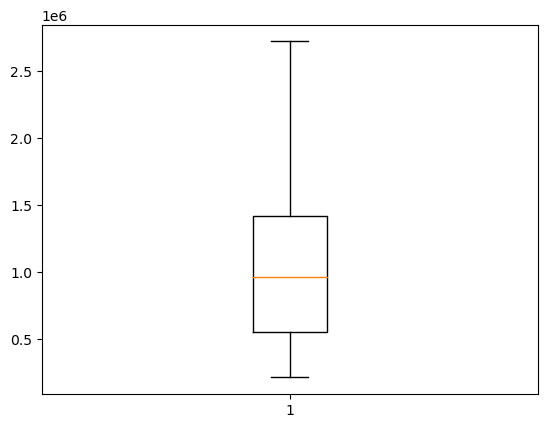

In [111]:
plt.boxplot(new_df["Weekly_Sales"])
plt.show()

<h1><mark>now we can see that we removed the outliers from Weekly_Sales column</mark></h1>

<h1><mark>now we will do the same for other columns</mark></h1>

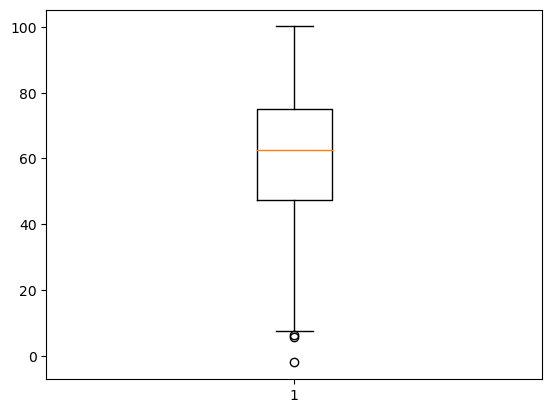

In [112]:
plt.boxplot(new_df["Temperature"])
plt.show()

In [113]:
q1=new_df["Temperature"].quantile(0.25)
q3=new_df["Temperature"].quantile(0.75)
iqr=q3-q1
q1,q3,iqr


(47.46, 74.94, 27.479999999999997)

In [114]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(116.16, 6.240000000000002)

In [115]:
df.loc[(new_df["Temperature"]>upper_limit)|(new_df["Temperature"]<lower_limit)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
910,7,04-02-2011,558027.77,0,-2.06,3.011,191.762589,8.818
2336,17,07-01-2011,1083071.14,0,6.23,2.891,127.191774,6.866
3626,26,28-01-2011,817485.14,0,5.54,3.243,133.105968,7.907


In [116]:
new_df=new_df.loc[(new_df["Temperature"]<upper_limit)&(new_df["Temperature"]>lower_limit)]
print("before removing outliers :",len(df))
print("after removing outliers :",len(new_df))
print("outliers :",len(df)-len(new_df))

before removing outliers : 6435
after removing outliers : 6432
outliers : 3


In [117]:
new_df1=new_df.copy()
new_df1.loc[(new_df["Temperature"]>upper_limit),"Temperature"]=upper_limit
new_df1.loc[(new_df["Temperature"]<lower_limit),"Temperature"]=lower_limit

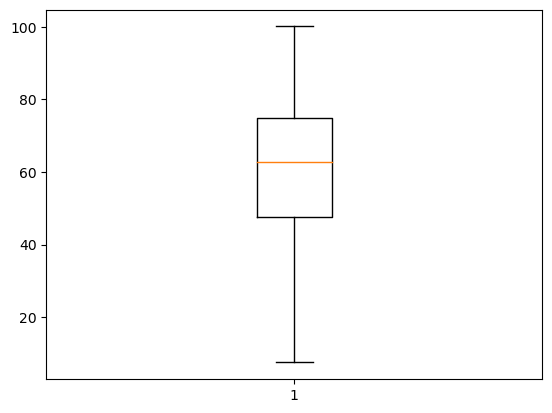

In [118]:
plt.boxplot(new_df1["Temperature"])
plt.show()

<h1><mark>let's take another column</mark></h1>

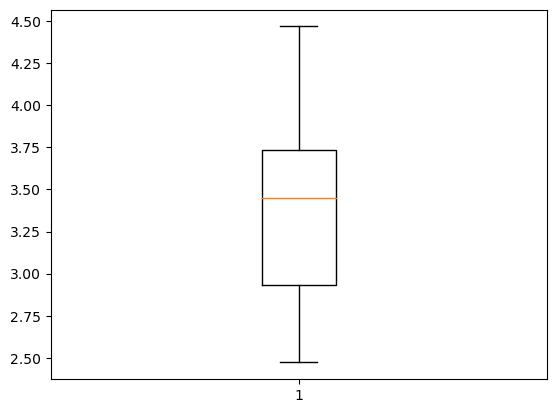

In [119]:
plt.boxplot(new_df1["Fuel_Price"])
plt.show()

<h1><mark>we can see there is no outlier so we move on</mark></h1>

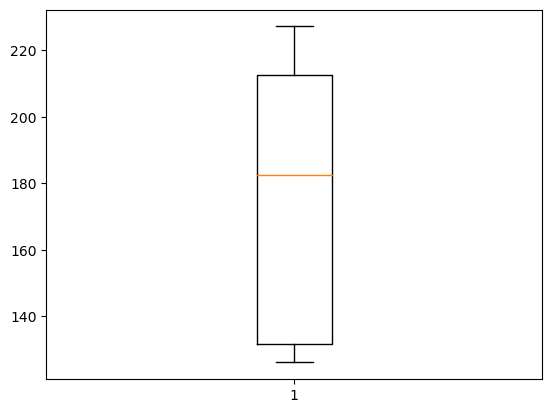

In [120]:
plt.boxplot(new_df1["CPI"])
plt.show()

<h1><mark>we can see there is no outlier so we move on</mark></h1>

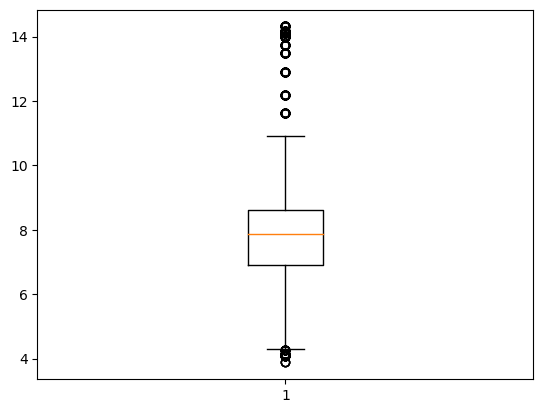

In [121]:
plt.boxplot(new_df1["Unemployment"])
plt.show()

In [122]:
q1=new_df["Unemployment"].quantile(0.25)
q3=new_df["Unemployment"].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(6.891, 8.622, 1.7309999999999999)

In [123]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(11.218499999999999, 4.2945)

In [124]:
new_df.loc[(new_df1["Unemployment"]>upper_limit)|(new_df1["Unemployment"]<lower_limit)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
555,4,06-07-2012,2224499.28,0,80.37,3.187,130.719633,4.077
556,4,13-07-2012,2100252.61,0,76.86,3.224,130.683000,4.077
557,4,20-07-2012,2175563.69,0,79.14,3.263,130.701290,4.077
558,4,27-07-2012,2048613.65,0,81.06,3.356,130.719581,4.077
559,4,03-08-2012,2174514.13,0,83.86,3.374,130.737871,4.077
...,...,...,...,...,...,...,...,...
5715,40,28-09-2012,919595.44,0,50.98,4.018,138.739500,4.156
5716,40,05-10-2012,1069112.00,0,57.21,4.027,138.825600,4.145
5717,40,12-10-2012,982523.26,0,47.35,4.029,138.911700,4.145
5718,40,19-10-2012,918170.50,0,46.33,4.000,138.833613,4.145


In [125]:
new_df1=new_df1.loc[(new_df1["Unemployment"]<upper_limit)&(new_df1["Unemployment"]>lower_limit)]
print("before removing outliers :",len(new_df))
print("after removing outliers :",len(new_df1))
print("outliers :",len(new_df)-len(new_df1))

before removing outliers : 6432
after removing outliers : 5951
outliers : 481


In [126]:
new_df2=new_df1.copy()
new_df2.loc[(new_df1["Unemployment"]>=upper_limit),"Unemployment"]=upper_limit
new_df2.loc[(new_df1["Unemployment"]<=lower_limit),"Unemployment"]=lower_limit

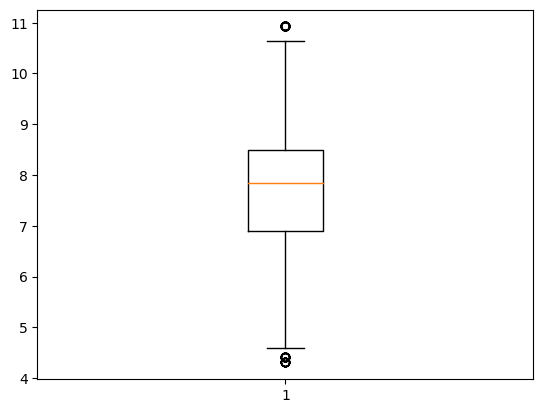

In [127]:
plt.boxplot(new_df2["Unemployment"])
plt.show()

<h1><mark>now we can see that we removed most of the outliers and those values are not outliers but they are some high or low values but with in the range of upper and lower limits</mark></h1>

In [128]:
new_df2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [129]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5951 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5951 non-null   int64  
 1   Date          5951 non-null   object 
 2   Weekly_Sales  5951 non-null   float64
 3   Holiday_Flag  5951 non-null   int64  
 4   Temperature   5951 non-null   float64
 5   Fuel_Price    5951 non-null   float64
 6   CPI           5951 non-null   float64
 7   Unemployment  5951 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 418.4+ KB


In [130]:
new_df2.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5951.000000,5.951000e+03,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000
mean,22.744077,1.048917e+06,0.070240,60.318278,3.339541,174.934816,7.720502
std,13.089024,5.647642e+05,0.255573,18.414659,0.457431,39.028421,1.242707
min,1.000000,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000
25%,11.000000,5.540650e+05,0.000000,46.795000,2.891000,132.761933,6.891000
50%,22.000000,9.515496e+05,0.000000,62.400000,3.417000,189.842483,7.852000
75%,34.000000,1.436634e+06,0.000000,74.665000,3.720000,213.764640,8.494000
max,45.000000,2.720371e+06,1.000000,100.140000,4.468000,227.232807,10.926000


<h1><mark>now let's make the same visualization after we clean the data</mark><h1>

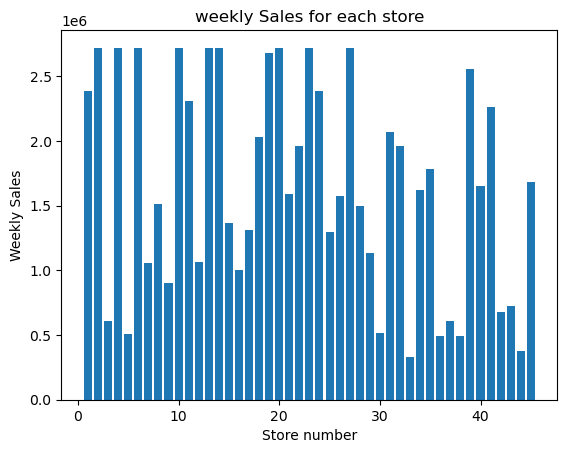

In [131]:
plt.bar(new_df2["Store"],new_df2["Weekly_Sales"])
plt.xlabel("Store number")
plt.ylabel("Weekly Sales")
plt.title("weekly Sales for each store")
plt.show()

In [132]:
sales=new_df2.groupby(new_df2["Store"])["Weekly_Sales"].sum()
sales_frame=sales.to_frame().reset_index()
sales_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         45 non-null     int64  
 1   Weekly_Sales  45 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 852.0 bytes


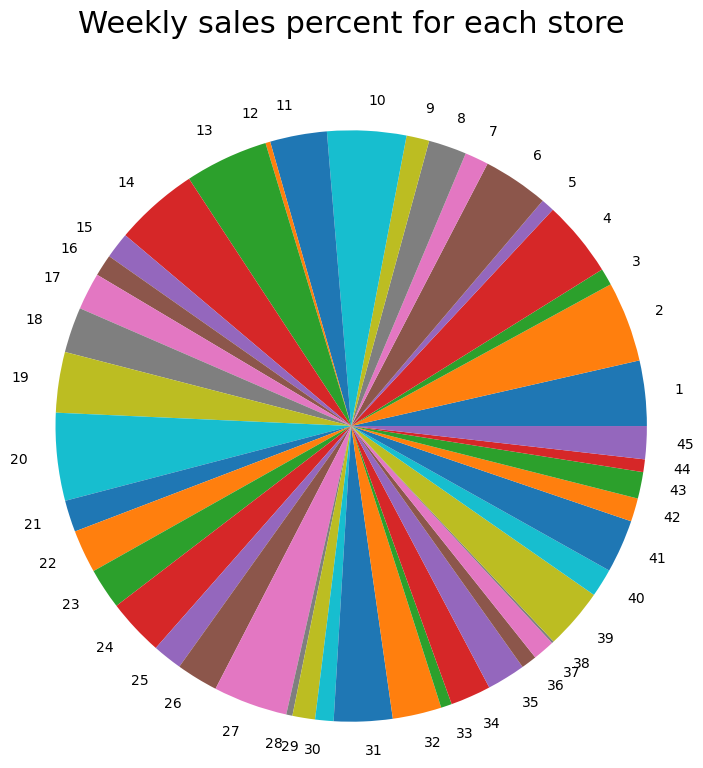

In [133]:
plt.pie(sales_frame["Weekly_Sales"],labels=sales_frame["Store"],radius = 2)
plt.title("Weekly sales percent for each store",size=22,pad=150)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

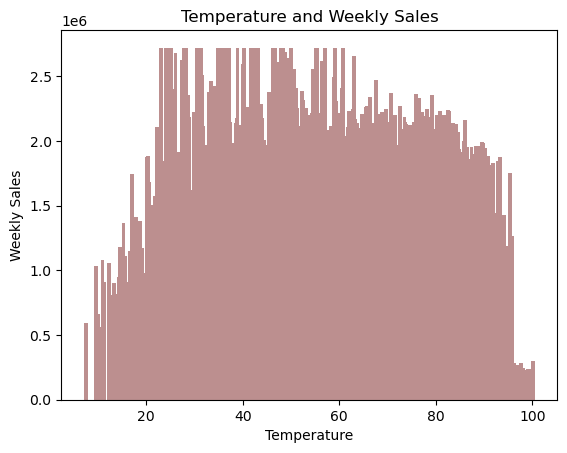

In [134]:
plt.bar(new_df2["Temperature"],new_df2["Weekly_Sales"],color="rosybrown")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Temperature and Weekly Sales")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

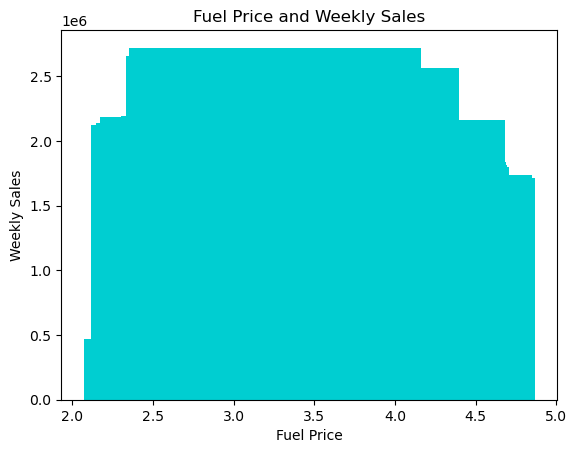

In [135]:
plt.bar(new_df2["Fuel_Price"],new_df2["Weekly_Sales"],color="darkturquoise")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.title("Fuel Price and Weekly Sales")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

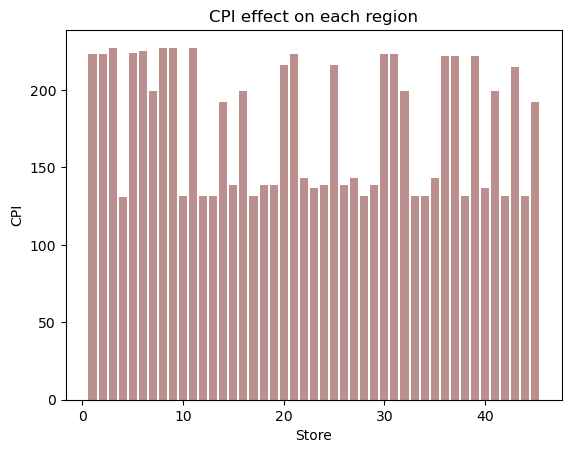

In [136]:
plt.bar(new_df2["Store"],new_df2["CPI"],color="rosybrown")
plt.xlabel("Store")
plt.ylabel("CPI")
plt.title("CPI effect on each region")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

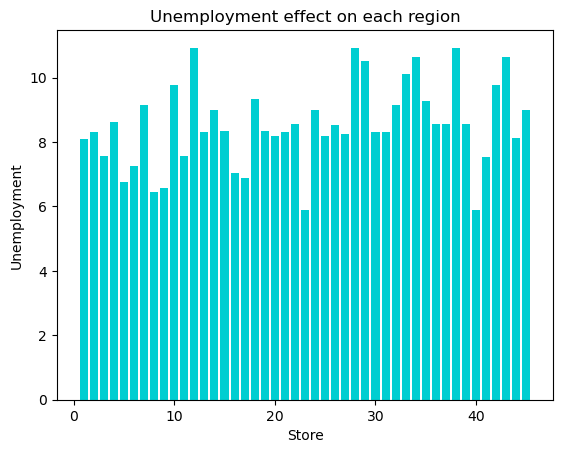

In [137]:
plt.bar(new_df2["Store"],new_df2["Unemployment"],color="darkturquoise")
plt.xlabel("Store")
plt.ylabel("Unemployment")
plt.title("Unemployment effect on each region")
plt.show

<h1><mark>we can now answer the questions</mark><h1>

<h1><mark>1- Which store has maximum sales? (before clean outliers)</mark><h1>

In [138]:
total_sales=df.groupby("Store")["Weekly_Sales"].sum().round().sort_values(ascending=False)
pd.DataFrame(total_sales).head(1)

,Weekly_Sales
Store,
20,301397792.0


<h1><mark>1- Which store has maximum sales? (after clean outliers)</mark><h1>

In [139]:
total_sales=new_df2.groupby("Store")["Weekly_Sales"].sum().round().sort_values(ascending=False)

In [140]:
pd.DataFrame(total_sales).head(1)

,Weekly_Sales
Store,
20,299066335.0


<h1><mark>store 20 has bigest weekly sales</mark></h1>

<h1><mark>2- Which store has maximum standard deviation?</mark><h1>

<h1><mark>Answer before cleaning outliers</mark><h1>

In [141]:
store_std=df.groupby("Store")["Weekly_Sales"].std().round(3).sort_values(ascending=False)
pd.DataFrame(store_std).head()

,Weekly_Sales
Store,
14,317569.949
10,302262.063
20,275900.563
4,266201.442
13,265506.996


<h1><mark>store 14 has max std</mark><h1>

<h1><mark>Answer after cleaning outliers</mark><h1>

In [142]:
store_std=new_df2.groupby("Store")["Weekly_Sales"].std().round(3).sort_values(ascending=False)

In [143]:
pd.DataFrame(store_std).head()

,Weekly_Sales
Store,
23,282984.857
14,263225.820
10,227376.298
27,227253.962
39,217466.455


<h1><mark>store 23 has max std</mark><h1>

<h1><mark>3- Some holidays have a negative impact on sales?</mark><h1>

<h1><mark>Answer after cleaning outliers</mark><h1>


In [144]:
from datetime import datetime
new_df2['Date'] = pd.to_datetime(new_df2['Date'], format='%d-%m-%Y')

In [145]:
new_df2.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [146]:
super_bowl = ['12-02-2010', '11-02-2011', '10-02-2012']
labour_day = ['10-09-2010', '09-09-2011', '07-09-2012']
thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012']
christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [147]:
super_bowl_sales = df.loc[df['Date'].isin(super_bowl)]['Weekly_Sales'].mean().round(2)
labour_day_sales = df.loc[df['Date'].isin(labour_day)]['Weekly_Sales'].mean().round(2)
thanksgiving_sales = df.loc[df['Date'].isin(thanksgiving)]['Weekly_Sales'].mean().round(2)
christmas_sales = df.loc[df['Date'].isin(christmas)]['Weekly_Sales'].mean().round(2)

In [148]:
print("Super Bowl Sales:", super_bowl_sales)
print("Labour Day Sales:", labour_day_sales)
print("Thanksgiving Sales:", thanksgiving_sales)
print("Christmas Sales:", christmas_sales)

Super Bowl Sales: 1079127.99
Labour Day Sales: 1042427.29
Thanksgiving Sales: 1471273.43
Christmas Sales: 960833.11


In [149]:
non_holiday_sales =new_df2[(df['Holiday_Flag']==0)]['Weekly_Sales'].mean().round(2)
non_holiday_sales

C:\Users\abdelrhman\AppData\Local\Temp\ipykernel_22148\1450390179.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_holiday_sales =new_df2[(df['Holiday_Flag']==0)]['Weekly_Sales'].mean().round(2)


1043257.19

In [150]:
compare=pd.DataFrame([{"Super Bowl Sales" :super_bowl_sales,
                       "Labour Day Sales":labour_day_sales,
                       "Thanksgiving Sales":thanksgiving_sales,
                       "Christmas Sales":christmas_sales,
                       "non_holiday_sales":non_holiday_sales}])
compare

,Super Bowl Sales,Labour Day Sales,Thanksgiving Sales,Christmas Sales,non_holiday_sales
0,1079127.99,1042427.29,1471273.43,960833.11,1043257.19


<h1><mark>4- Provide a monthly and semester view of sales in units and give insights.and give insights.</mark><h1>

<h1><mark>Answer after cleaning outliers</mark><h1>


In [151]:
new_df2['Date'] = pd.to_datetime(new_df2['Date'], format='%d-%m-%Y')
new_df2['year'] = pd.DatetimeIndex(new_df2['Date']).year
new_df2['month'] = new_df2['Date'].dt.month_name()
new_df2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,February
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,February
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,March


In [152]:
month_sales = new_df2.groupby('month')[['Weekly_Sales']].sum().round(2)
month_sales_sorted = month_sales.sort_values(by='Weekly_Sales', ascending=False)
month_sales_sorted

,Weekly_Sales
month,
July,6.062784e+08
April,5.999488e+08
June,5.751681e+08
August,5.686695e+08
March,5.454199e+08
October,5.438296e+08
September,5.383383e+08
December,5.348219e+08
February,5.231610e+08


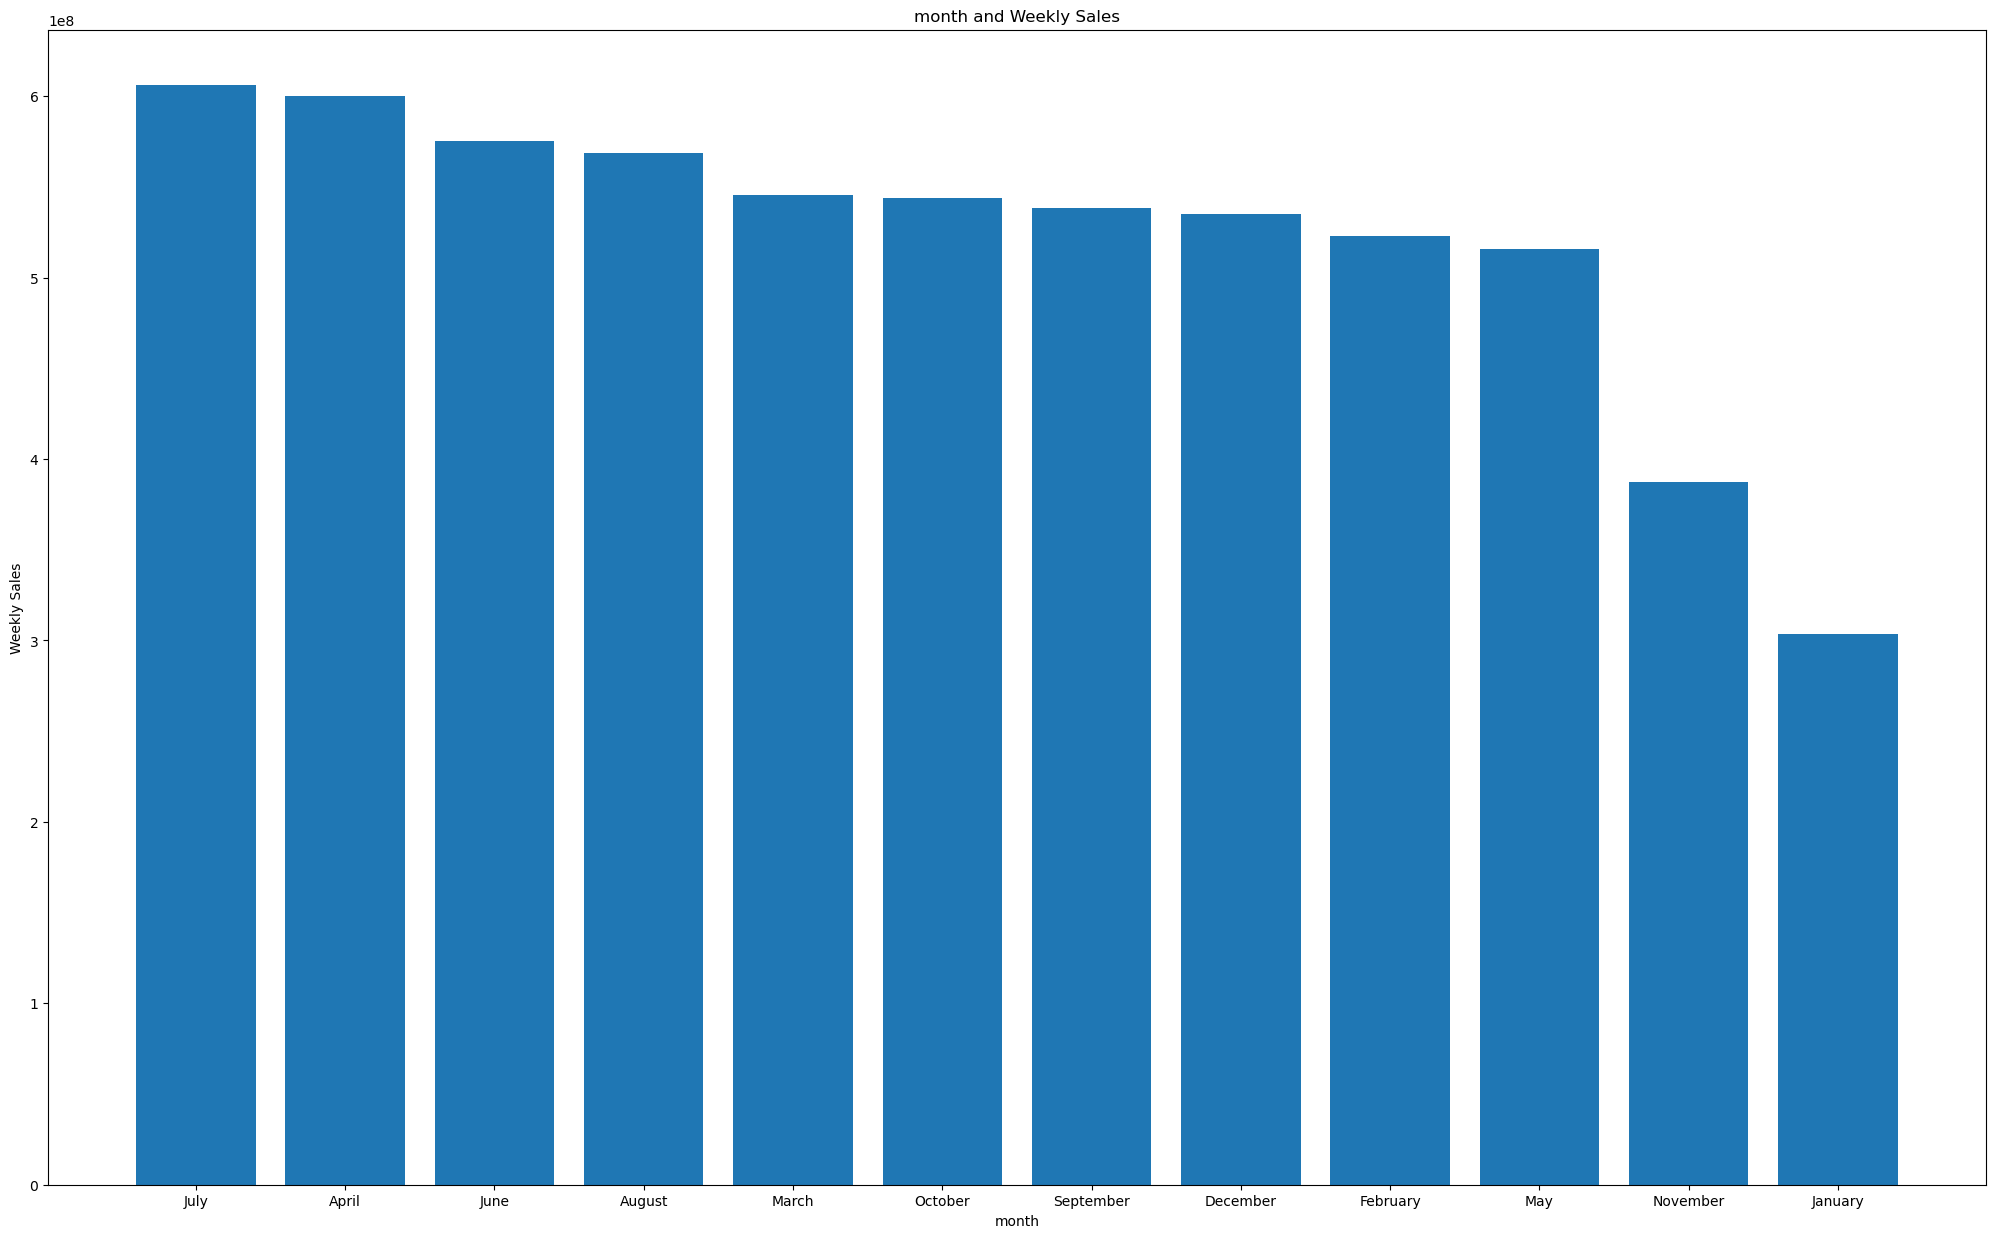

In [153]:
plt.figure(figsize=(25,15))
plt.bar(month_sales_sorted.index,month_sales_sorted["Weekly_Sales"])
plt.xlabel("month")
plt.ylabel("Weekly Sales")
plt.title("month and Weekly Sales")
plt.show()

<h1><mark>we can see that december is highest weekly sales month</mark><h1>

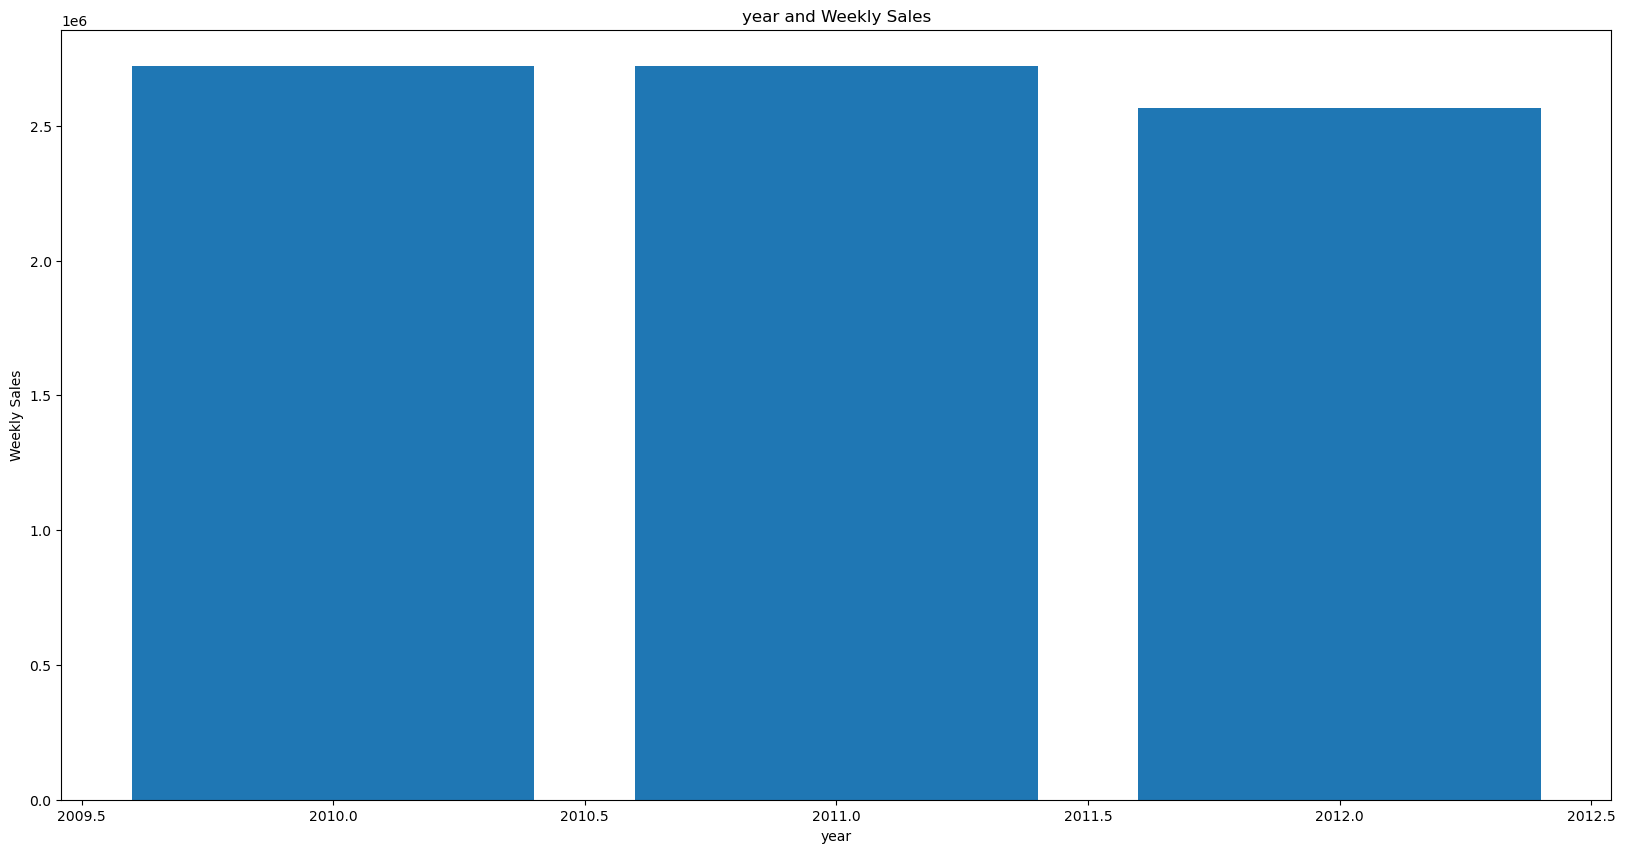

In [154]:
plt.figure(figsize=(20,10))
plt.bar(new_df2["year"],new_df2["Weekly_Sales"])
plt.xlabel("year")
plt.ylabel("Weekly Sales")
plt.title("year and Weekly Sales")
plt.show()

In [155]:
years_sales = new_df2.groupby('year')[['Weekly_Sales']].sum().round(2)
years_sales_sorted = years_sales.sort_values(by='Weekly_Sales', ascending=False)
years_sales_sorted

,Weekly_Sales
year,
2011,2.298519e+09
2010,2.152237e+09
2012,1.791352e+09


<h1><mark>we can see that 2011 is highest weekly sales year</mark><h1>

<h1><mark>5- Plot the relations between weekly sales vs. other numeric features and give insights.</mark><h1>

<h4><mark>if you want graphs before cleaning outliers you can go to vizualization before cleaning in the to of the nootbook</mark><h4>

<h1><mark>Answer after cleaning outliers</mark><h1>

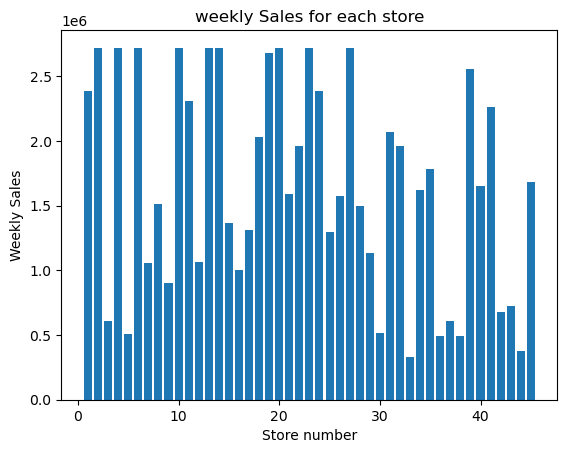

In [156]:
plt.bar(new_df2["Store"],new_df2["Weekly_Sales"])
plt.xlabel("Store number")
plt.ylabel("Weekly Sales")
plt.title("weekly Sales for each store")
plt.show()

<h1><mark>in this plot we show highest weekly sales stores </mark><h1>

<function matplotlib.pyplot.show(close=None, block=None)>

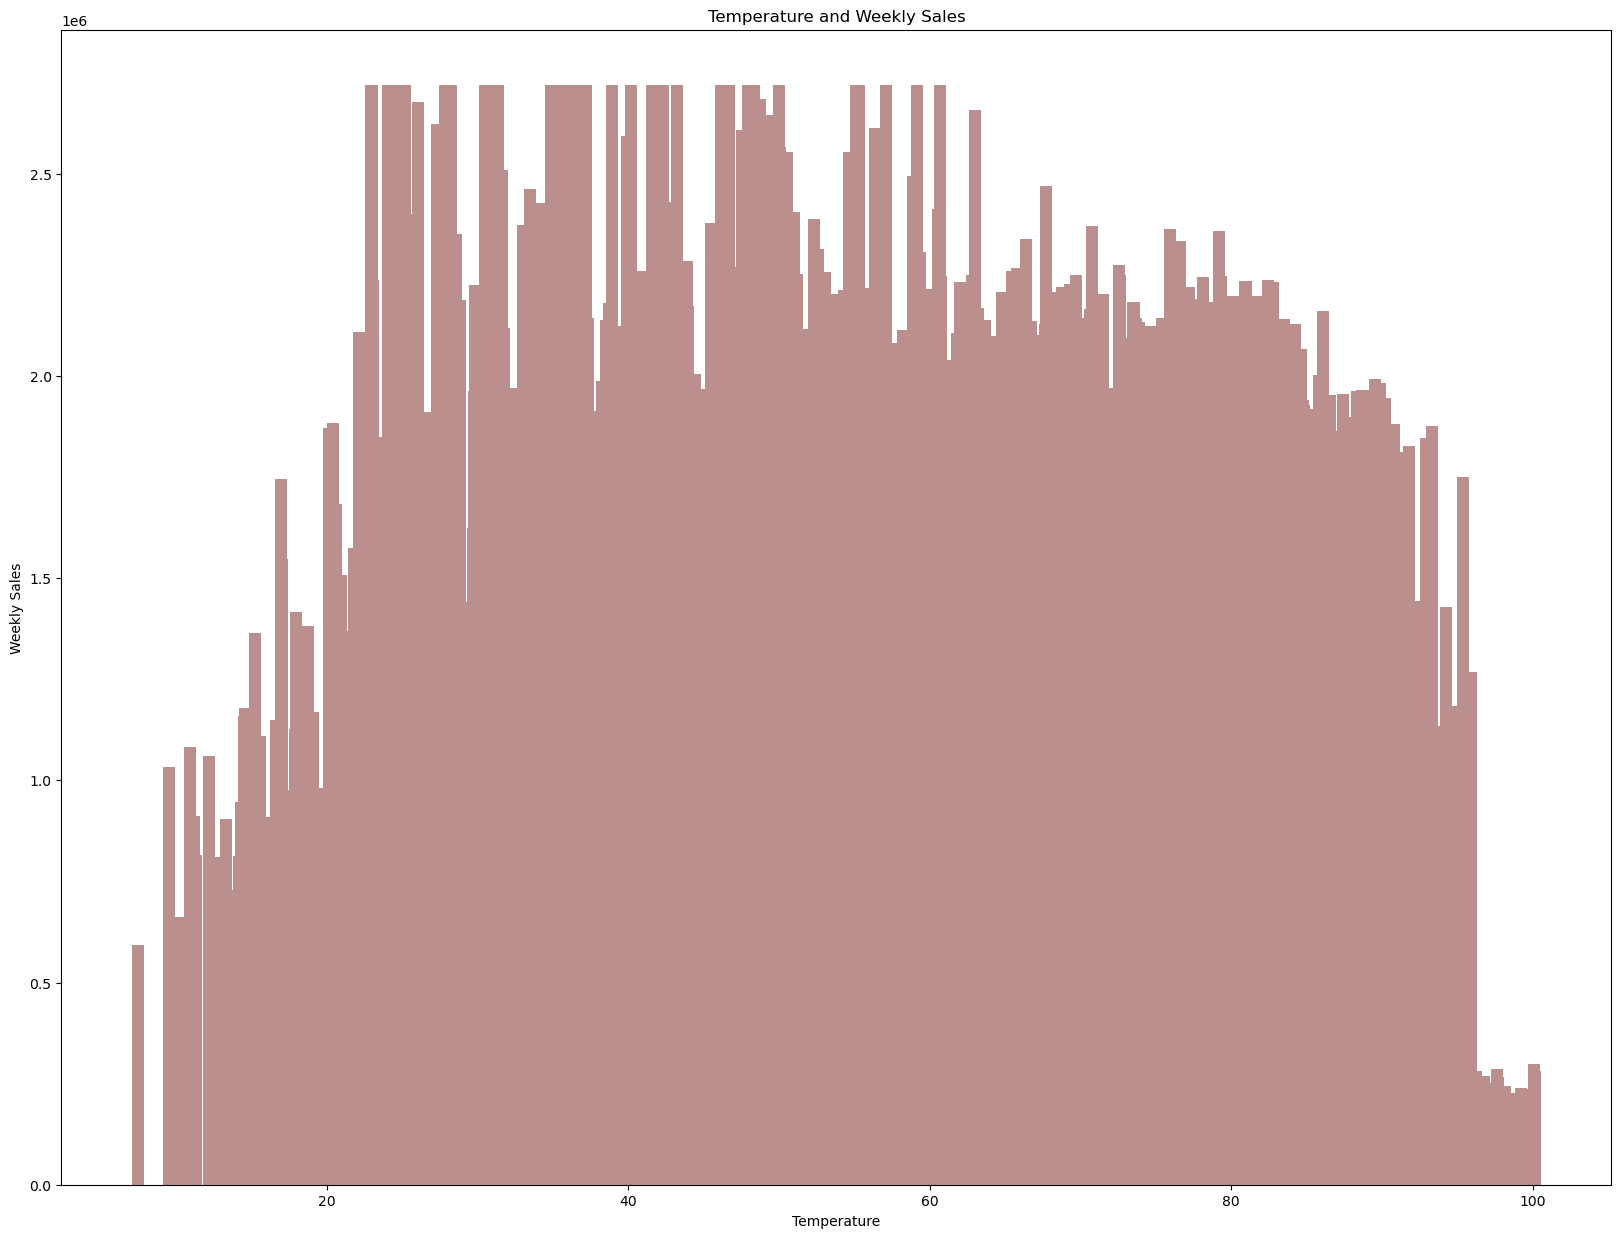

In [157]:
plt.figure(figsize=(20,15))
plt.bar(new_df2["Temperature"],new_df2["Weekly_Sales"],color="rosybrown")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Temperature and Weekly Sales")
plt.show

<h1><mark>we can see that weekly sales increase as tempreture doesn't go above 60 </mark><h1>

<function matplotlib.pyplot.show(close=None, block=None)>

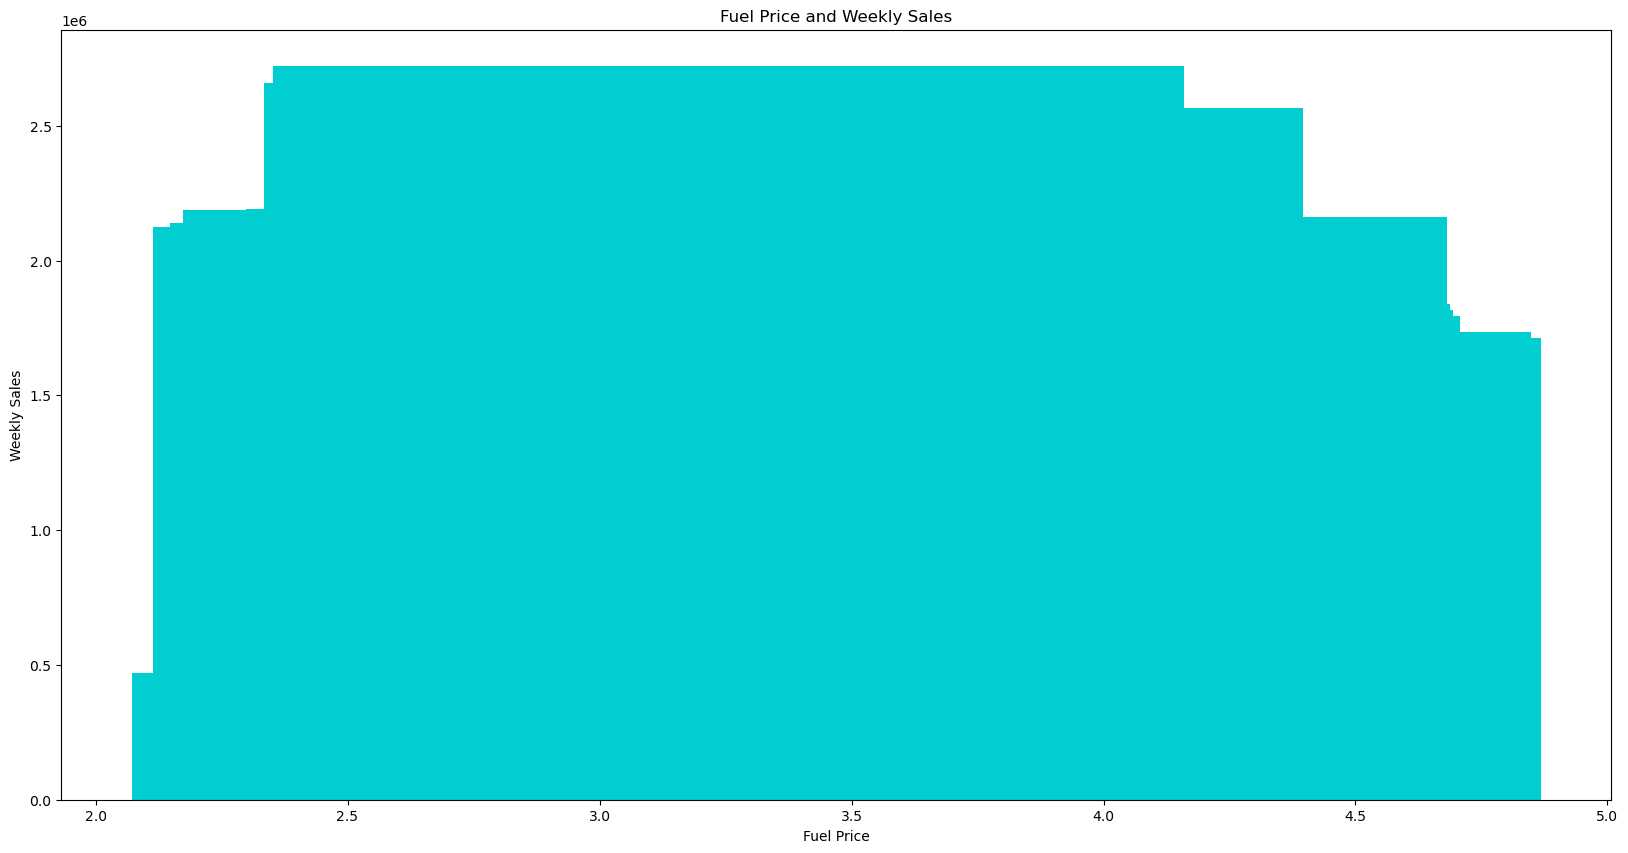

In [158]:
plt.figure(figsize=(20,10))
plt.bar(new_df2["Fuel_Price"],new_df2["Weekly_Sales"],color="darkturquoise")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.title("Fuel Price and Weekly Sales")
plt.show

<h1><mark>we can see that weekly sales increase until fuel price reach aproximate 4.2 then it decreases</mark><h1>

<function matplotlib.pyplot.show(close=None, block=None)>

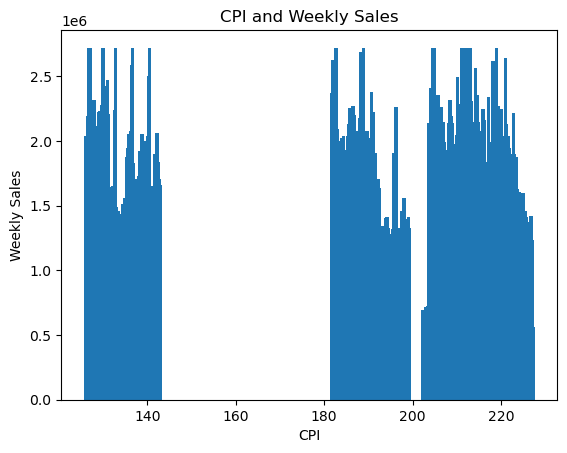

In [159]:
plt.bar(new_df2["CPI"],new_df2["Weekly_Sales"])
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.title("CPI and Weekly Sales")
plt.show

<h3><mark>we can see that weekly sales increase when cpi goes about 140 then it decreases till it reach aproximate 180 to 240 it increases again</mark><h3>

<function matplotlib.pyplot.show(close=None, block=None)>

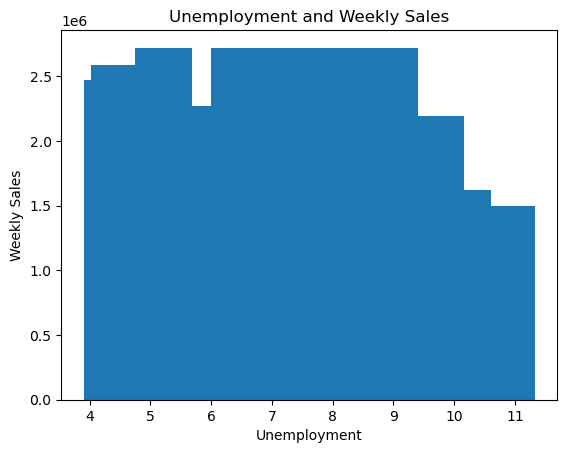

In [160]:
plt.bar(new_df2["Unemployment"],new_df2["Weekly_Sales"])
plt.xlabel("Unemployment")
plt.ylabel("Weekly Sales")
plt.title("Unemployment and Weekly Sales")
plt.show

<h3><mark>we can see that weekly sales increase as unemployment about to reach 9 then it decrese so 9 is aproximate the turn point</mark><h3>